In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df=pd.read_csv(r'C:\Users\miahm\Downloads\movies.csv.zip')

In [83]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [89]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [91]:
df['budget'] = df['budget'].fillna(0.0)
df['budget']

df['gross']=df['gross'].fillna(0)
df['gross']

df['rating']=df['rating'].fillna(0)
df['rating']

0               R
1               R
2              PG
3              PG
4               R
5               R
6               R
7               R
8              PG
9               R
10             PG
11             PG
12             PG
13              R
14              R
15             PG
16              R
17             PG
18              R
19              R
20              R
21              R
22             PG
23             PG
24             PG
25              R
26              R
27             PG
28              R
29              R
30             PG
31              R
32             PG
33             PG
34             PG
35              R
36              R
37              R
38             PG
39             PG
40             PG
41             PG
42              R
43              R
44              R
45              R
46              R
47              R
48             PG
49             PG
50             PG
51              R
52             PG
53             PG
54              R
55        

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [ ]:
df.head()

In [ ]:
df['released_clean'] = df['released'].str.extract(r'([A-Za-z]+ \d{1,2}, \d{4})')
df['released_clean'] = pd.to_datetime(df['released_clean'], format='%B %d, %Y', errors='coerce')

In [ ]:
df['released_year']=df['released_clean'].astype(str).str[:4]
df.head()

In [ ]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [ ]:
pd.set_option('display.max.rows',None)

In [ ]:
df.drop_duplicates()

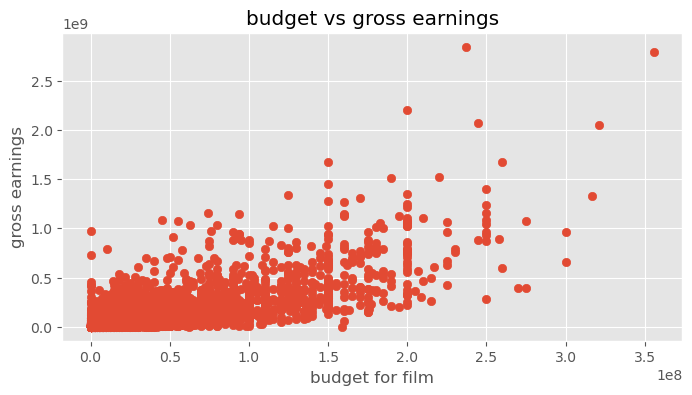

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('budget vs gross earnings')
plt.xlabel('budget for film')
plt.ylabel('gross earnings')
plt.show()


In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018


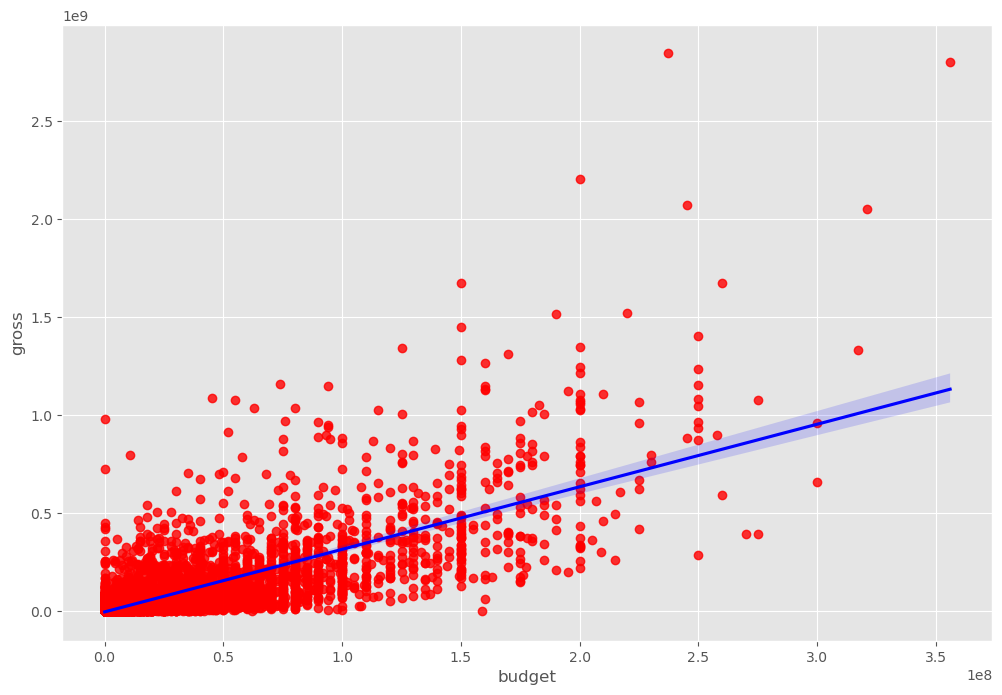

<Figure size 500x200 with 0 Axes>

In [46]:
sns.regplot(x="budget", y="gross", data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.figure(figsize=(5,2))
plt.show()

In [62]:
df=df.corr(numeric_only=True)
df

,year,score,votes,budget,gross,runtime
year,1.000000,-0.547255,-0.400450,-0.003180,-0.157137,-0.552519
score,-0.547255,1.000000,0.025952,-0.732123,-0.528509,0.292079
votes,-0.400450,0.025952,1.000000,0.329262,0.588396,-0.231660
budget,-0.003180,-0.732123,0.329262,1.000000,0.861974,-0.350188
gross,-0.157137,-0.528509,0.588396,0.861974,1.000000,-0.401538
runtime,-0.552519,0.292079,-0.231660,-0.350188,-0.401538,1.000000


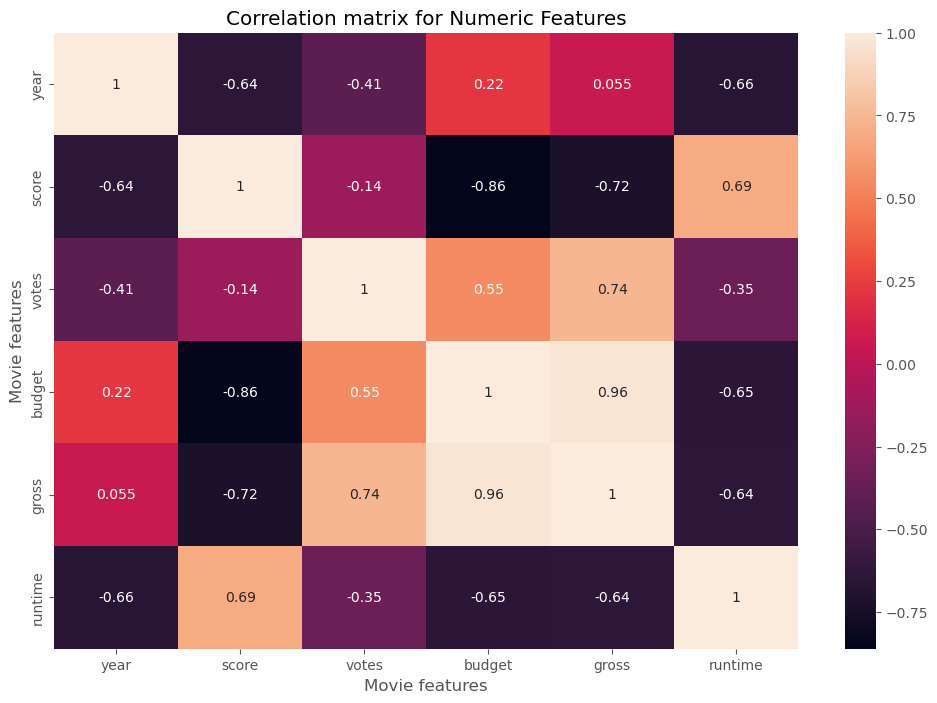

In [64]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [105]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,released_year
name,1.000000,0.344538,0.138367,0.253906,0.654708,0.107033,0.595709,0.720119,0.782765,0.652683,0.190638,0.111217,0.978147,0.682797,0.071772,0.525403,0.256430
rating,0.344538,1.000000,-0.014784,0.036004,0.263197,-0.069097,0.154171,0.283992,0.302740,0.302907,0.198360,0.083569,0.351587,0.331734,0.033730,0.174168,0.028958
genre,0.138367,-0.014784,1.000000,0.087977,0.091335,0.063222,0.148546,0.093457,0.088163,0.098061,-0.073897,0.101274,0.134001,0.059056,0.005585,0.101554,0.085155
year,0.253906,0.036004,0.087977,1.000000,0.316020,0.076737,0.326475,0.173235,0.212293,0.227655,-0.053654,0.060244,0.266957,0.121289,0.032916,0.386133,0.935420
released,0.654708,0.263197,0.091335,0.316020,1.000000,0.069218,0.450235,0.502899,0.547861,0.476127,0.162192,0.081224,0.668367,0.465426,0.048272,0.821622,0.329419
score,0.107033,-0.069097,0.063222,0.076737,0.069218,1.000000,0.233438,0.149666,0.103866,0.106351,-0.098455,0.001150,0.113338,0.036171,0.035609,0.104861,0.083827
votes,0.595709,0.154171,0.148546,0.326475,0.450235,0.233438,1.000000,0.495005,0.521115,0.451158,0.050876,0.038523,0.611780,0.390203,0.067696,0.424035,0.324622
director,0.720119,0.283992,0.093457,0.173235,0.502899,0.149666,0.495005,1.000000,0.696031,0.580146,0.197110,0.043335,0.737284,0.614151,0.080150,0.395940,0.175311
writer,0.782765,0.302740,0.088163,0.212293,0.547861,0.103866,0.521115,0.696031,1.000000,0.589832,0.201882,0.064136,0.797703,0.616007,0.057754,0.434821,0.209642
star,0.652683,0.302907,0.098061,0.227655,0.476127,0.106351,0.451158,0.580146,0.589832,1.000000,0.221251,0.064888,0.669416,0.569721,0.072543,0.381058,0.232177


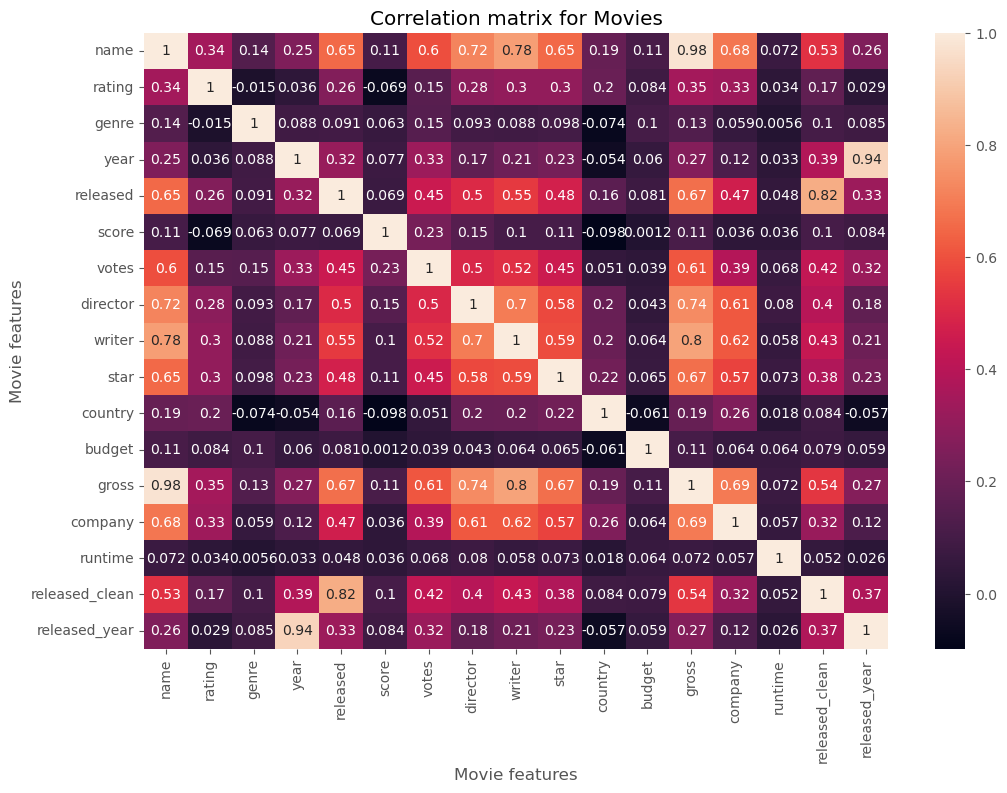

In [107]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [109]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name            name              1.000000
                rating            0.344538
                genre             0.138367
                year              0.253906
                released          0.654708
                score             0.107033
                votes             0.595709
                director          0.720119
                writer            0.782765
                star              0.652683
                country           0.190638
                budget            0.111217
                gross             0.978147
                company           0.682797
                runtime           0.071772
                released_clean    0.525403
                released_year     0.256430
rating          name              0.344538
                rating            1.000000
                genre            -0.014784
                year              0.036004
                released          0.263197
                score            -0.069097
           

In [111]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country         score            -0.098455
score           country          -0.098455
genre           country          -0.073897
country         genre            -0.073897
rating          score            -0.069097
score           rating           -0.069097
country         budget           -0.061499
budget          country          -0.061499
country         released_year    -0.057396
released_year   country          -0.057396
year            country          -0.053654
country         year             -0.053654
rating          genre            -0.014784
genre           rating           -0.014784
budget          score             0.001150
score           budget            0.001150
runtime         genre             0.005585
genre           runtime           0.005585
country         runtime           0.017505
runtime         country           0.017505
                released_year     0.026341
released_year   runtime           0.026341
rating          released_year     0.028958
released_ye

In [113]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released        director          0.502899
director        released          0.502899
votes           writer            0.521115
writer          votes             0.521115
released_clean  name              0.525403
name            released_clean    0.525403
released_clean  gross             0.537325
gross           released_clean    0.537325
released        writer            0.547861
writer          released          0.547861
company         star              0.569721
star            company           0.569721
director        star              0.580146
star            director          0.580146
writer          star              0.589832
star            writer            0.589832
name            votes             0.595709
votes           name              0.595709
gross           votes             0.611780
votes           gross             0.611780
company         director          0.614151
director        company           0.614151
company         writer            0.616007
writer     

In [115]:
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [121]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1+2 Seisaku Iinkai                                 2000     1196218
10 West Studios                                    2010      814906
120 Films                                          2002     6479328
120dB Films                                        2009       26676
                                                   2016      368372
13 Productions                                     2000       25461
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
1992 Number Four Limited Partnership               1995     4686937
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1989     3953745
                                                   1990     7658401
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2013     3114953
                                                   2017     5042014
360 Pictures                                       2007     9669758
391 Productions                                    1998     1960216
                                                   1999       92442
3B Productions                                     1999           0
                                                   2003      167999
3Mark Entertainment                                2001     4760014
4 1/2 Film                                         2006     1297260
4 Kids Entertainment                               1999   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                  

In [123]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)
plt.show()